In [48]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# Load the data. 
# Used zip file bcse csv file was too big to upload to github.
#df = pd.read_csv('../Resources/2017.csv')
df = pd.read_csv('2017.csv')
df 

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,206.0,189.0,171.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.OP_CARRIER.unique()

array(['AA', 'B6', 'EV', 'HA', 'NK', 'OO', 'UA', 'VX', 'AS', 'WN', 'DL',
       'F9'], dtype=object)

In [51]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [52]:
df.OP_CARRIER.unique()

array(['American Airlines', 'JetBlue Airways', 'ExpressJet',
       'Hawaiian Airlines', 'Spirit Airlines', 'SkyWest Airlines',
       'United Airlines', 'Virgin America', 'Alaska Airlines',
       'Southwest Airlines', 'Delta Airlines', 'Frontier Airlines'],
      dtype=object)

In [53]:
#Deleting cancelled flights
df_new = df[df['CANCELLED']==0]


In [55]:
df['CANCELLED'].unique()

array([0., 1.])

In [56]:
print(f'Total rows = {len(df_new)}')

Total rows = 5591928


In [57]:
df.OP_CARRIER.value_counts()

Southwest Airlines    1329444
Delta Airlines         923560
American Airlines      896348
SkyWest Airlines       706527
United Airlines        584481
ExpressJet             339541
JetBlue Airways        298654
Alaska Airlines        185068
Spirit Airlines        156818
Frontier Airlines      103027
Hawaiian Airlines       80172
Virgin America          70981
Name: OP_CARRIER, dtype: int64

In [58]:
#Dropping the columns which are not required
df = df.drop(["OP_CARRIER_FL_NUM","DEP_TIME","ARR_TIME","CANCELLED","CANCELLATION_CODE","DIVERTED","CARRIER_DELAY"
             ,"WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"], axis=1)

In [59]:
df = df.drop(["Unnamed: 27"], axis=1)

In [60]:
for col in df.columns:
    print(col)

FL_DATE
OP_CARRIER
ORIGIN
DEST
CRS_DEP_TIME
DEP_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
CRS_ARR_TIME
ARR_DELAY
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
DISTANCE


In [61]:
df 

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0
3,2017-01-01,American Airlines,DFW,HNL,1135,77.0,19.0,1311.0,1744.0,5.0,1612,97.0,517.0,537.0,513.0,3784.0
4,2017-01-01,American Airlines,OGG,DFW,1855,0.0,16.0,1911.0,631.0,11.0,600,42.0,425.0,467.0,440.0,3711.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines,IAH,LAS,750,-6.0,14.0,758.0,849.0,4.0,916,-23.0,206.0,189.0,171.0,1222.0
5674617,2017-12-31,United Airlines,RSW,ORD,1611,-9.0,12.0,1614.0,1753.0,12.0,1821,-16.0,190.0,183.0,159.0,1120.0
5674618,2017-12-31,United Airlines,SNA,DEN,1335,-1.0,9.0,1343.0,1627.0,10.0,1649,-12.0,134.0,123.0,104.0,846.0
5674619,2017-12-31,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1224.0,15.0,1254,-15.0,99.0,92.0,66.0,414.0


In [62]:
print(f'Total rows = {len(df)}')

Total rows = 5674621


In [63]:
df = df.dropna()

In [64]:
print(f'Total rows = {len(df)}')

Total rows = 5579410


In [65]:
df.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

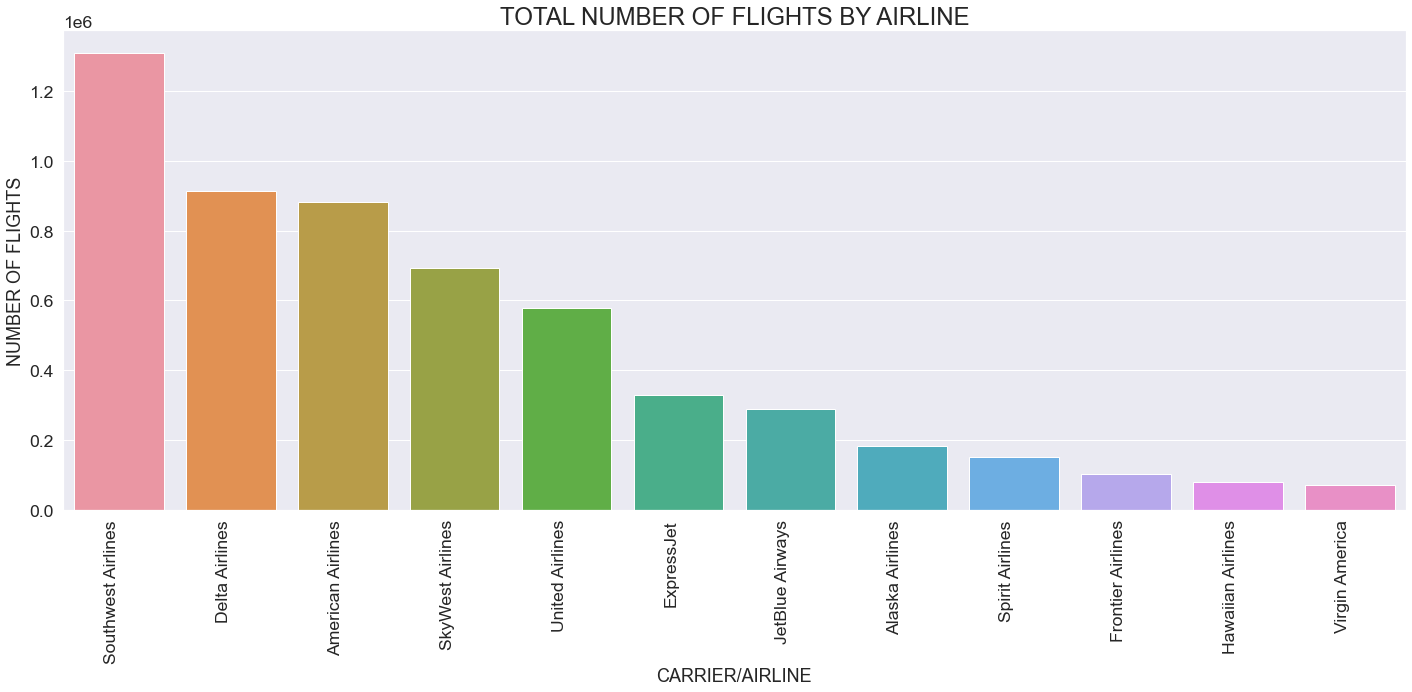

In [66]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['OP_CARRIER'], data=df, order=df['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [67]:
# Given we know by the Arr_Delay field if the flight was delayed we are going to add a field called Flight Status and make
# it binary where a "1" means the flight was delayed and a "0" means that it was not delayed

status = []

for value in df['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status
df.head(10)    

C:\Users\16784\AppData\Local\Temp/ipykernel_19096/3207546169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLIGHT_STATUS'] = status


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0,1
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0,1
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0,1
3,2017-01-01,American Airlines,DFW,HNL,1135,77.0,19.0,1311.0,1744.0,5.0,1612,97.0,517.0,537.0,513.0,3784.0,1
4,2017-01-01,American Airlines,OGG,DFW,1855,0.0,16.0,1911.0,631.0,11.0,600,42.0,425.0,467.0,440.0,3711.0,1
5,2017-01-01,American Airlines,DFW,OGG,940,399.0,12.0,1631.0,2031.0,6.0,1403,394.0,503.0,498.0,480.0,3711.0,1
6,2017-01-01,American Airlines,HNL,DFW,1838,25.0,19.0,1922.0,636.0,12.0,550,58.0,432.0,465.0,434.0,3784.0,1
7,2017-01-01,American Airlines,JFK,SFO,700,-4.0,22.0,718.0,1020.0,3.0,1045,-22.0,405.0,387.0,362.0,2586.0,0
8,2017-01-01,American Airlines,LAX,JFK,2100,0.0,15.0,2115.0,447.0,10.0,527,-30.0,327.0,297.0,272.0,2475.0,0
9,2017-01-01,American Airlines,SFO,JFK,1135,-5.0,27.0,1157.0,1937.0,17.0,2018,-24.0,343.0,324.0,280.0,2586.0,0


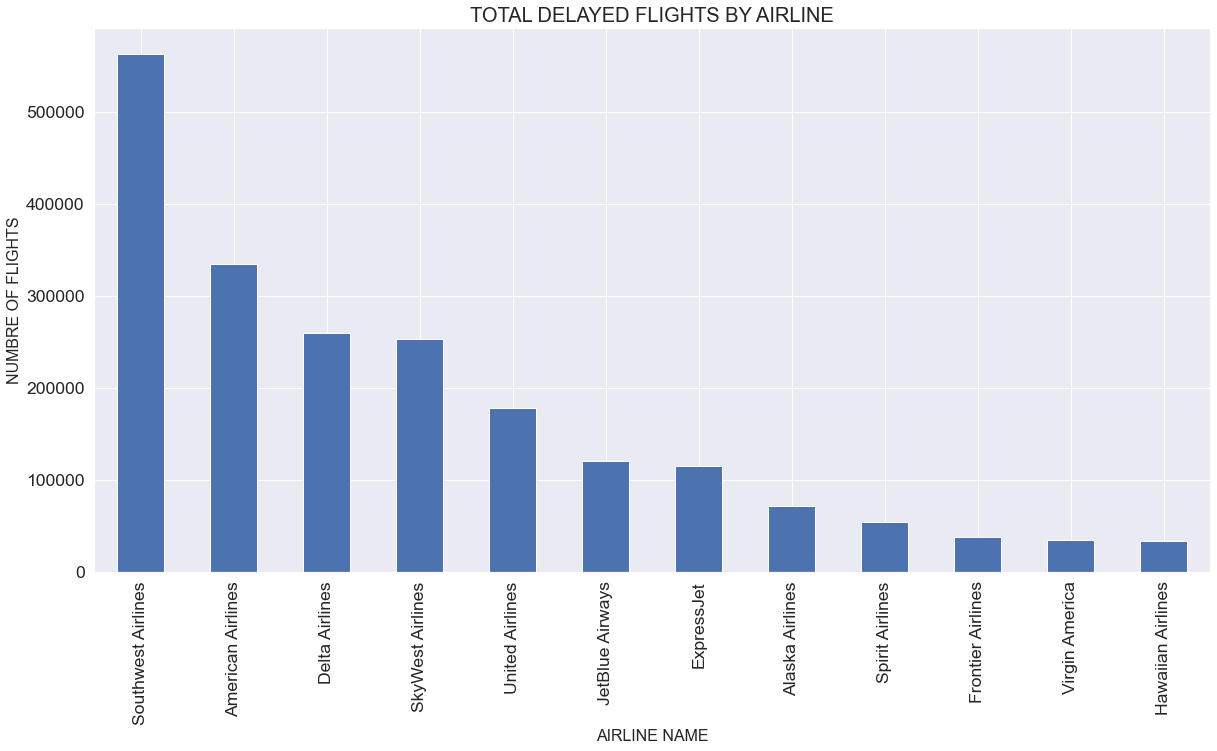

In [68]:
plt.figure(figsize=(20, 10))
df.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [70]:
# Creating Day and Month Columns so we can analyze if certain days or months have more flight delays

df['DAY'] = pd.DatetimeIndex(df['FL_DATE']).day
df['MONTH'] = pd.DatetimeIndex(df['FL_DATE']).month
df

C:\Users\16784\AppData\Local\Temp/ipykernel_19096/1461801167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY'] = pd.DatetimeIndex(df['FL_DATE']).day
C:\Users\16784\AppData\Local\Temp/ipykernel_19096/1461801167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = pd.DatetimeIndex(df['FL_DATE']).month


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0,1,1,1
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0,1,1,1
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0,1,1,1
3,2017-01-01,American Airlines,DFW,HNL,1135,77.0,19.0,1311.0,1744.0,5.0,1612,97.0,517.0,537.0,513.0,3784.0,1,1,1
4,2017-01-01,American Airlines,OGG,DFW,1855,0.0,16.0,1911.0,631.0,11.0,600,42.0,425.0,467.0,440.0,3711.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines,IAH,LAS,750,-6.0,14.0,758.0,849.0,4.0,916,-23.0,206.0,189.0,171.0,1222.0,0,31,12
5674617,2017-12-31,United Airlines,RSW,ORD,1611,-9.0,12.0,1614.0,1753.0,12.0,1821,-16.0,190.0,183.0,159.0,1120.0,0,31,12
5674618,2017-12-31,United Airlines,SNA,DEN,1335,-1.0,9.0,1343.0,1627.0,10.0,1649,-12.0,134.0,123.0,104.0,846.0,0,31,12
5674619,2017-12-31,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1224.0,15.0,1254,-15.0,99.0,92.0,66.0,414.0,0,31,12


In [71]:
# If we leave the military times for time based fields at the elemental levels they are, we create too many columns when we 
# hot encode, so we are separating the times in to 4 quadrants for the four time based fields below.  

df['CRS_DEP_TIME'] = np.ceil(df['CRS_DEP_TIME']/600).apply(int)
df['WHEELS_OFF'] = np.ceil(df['WHEELS_OFF']/600).apply(int) 
df['WHEELS_ON'] = np.ceil(df['WHEELS_ON']/600).apply(int)
df['CRS_ARR_TIME'] = np.ceil(df['CRS_ARR_TIME']/600).apply(int)

C:\Users\16784\AppData\Local\Temp/ipykernel_19096/1125054256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRS_DEP_TIME'] = np.ceil(df['CRS_DEP_TIME']/600).apply(int)
C:\Users\16784\AppData\Local\Temp/ipykernel_19096/1125054256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHEELS_OFF'] = np.ceil(df['WHEELS_OFF']/600).apply(int)
C:\Users\16784\AppData\Local\Temp/ipykernel_19096/1125054256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [72]:
df

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2017-01-01,American Airlines,JFK,LAX,2,31.0,25.0,2,2,26.0,2,27.0,402.0,398.0,347.0,2475.0,1,1,1
1,2017-01-01,American Airlines,LAX,JFK,2,34.0,34.0,2,3,12.0,3,42.0,327.0,335.0,289.0,2475.0,1,1,1
2,2017-01-01,American Airlines,LAX,JFK,2,51.0,20.0,3,4,15.0,4,42.0,328.0,319.0,284.0,2475.0,1,1,1
3,2017-01-01,American Airlines,DFW,HNL,2,77.0,19.0,3,3,5.0,3,97.0,517.0,537.0,513.0,3784.0,1,1,1
4,2017-01-01,American Airlines,OGG,DFW,4,0.0,16.0,4,2,11.0,1,42.0,425.0,467.0,440.0,3711.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines,IAH,LAS,2,-6.0,14.0,2,2,4.0,2,-23.0,206.0,189.0,171.0,1222.0,0,31,12
5674617,2017-12-31,United Airlines,RSW,ORD,3,-9.0,12.0,3,3,12.0,4,-16.0,190.0,183.0,159.0,1120.0,0,31,12
5674618,2017-12-31,United Airlines,SNA,DEN,3,-1.0,9.0,3,3,10.0,3,-12.0,134.0,123.0,104.0,846.0,0,31,12
5674619,2017-12-31,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,15.0,3,-15.0,99.0,92.0,66.0,414.0,0,31,12


In [74]:
import calendar
df['MONTH_NAME'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])

C:\Users\16784\AppData\Local\Temp/ipykernel_19096/262982856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH_NAME'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])


In [75]:
df

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH,MONTH_NAME
0,2017-01-01,American Airlines,JFK,LAX,2,31.0,25.0,2,2,26.0,2,27.0,402.0,398.0,347.0,2475.0,1,1,1,Jan
1,2017-01-01,American Airlines,LAX,JFK,2,34.0,34.0,2,3,12.0,3,42.0,327.0,335.0,289.0,2475.0,1,1,1,Jan
2,2017-01-01,American Airlines,LAX,JFK,2,51.0,20.0,3,4,15.0,4,42.0,328.0,319.0,284.0,2475.0,1,1,1,Jan
3,2017-01-01,American Airlines,DFW,HNL,2,77.0,19.0,3,3,5.0,3,97.0,517.0,537.0,513.0,3784.0,1,1,1,Jan
4,2017-01-01,American Airlines,OGG,DFW,4,0.0,16.0,4,2,11.0,1,42.0,425.0,467.0,440.0,3711.0,1,1,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines,IAH,LAS,2,-6.0,14.0,2,2,4.0,2,-23.0,206.0,189.0,171.0,1222.0,0,31,12,Dec
5674617,2017-12-31,United Airlines,RSW,ORD,3,-9.0,12.0,3,3,12.0,4,-16.0,190.0,183.0,159.0,1120.0,0,31,12,Dec
5674618,2017-12-31,United Airlines,SNA,DEN,3,-1.0,9.0,3,3,10.0,3,-12.0,134.0,123.0,104.0,846.0,0,31,12,Dec
5674619,2017-12-31,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,15.0,3,-15.0,99.0,92.0,66.0,414.0,0,31,12,Dec
